# Trabalho 7 - Mineração de Dados - DCC 127
# Algorimos de Classificação e métricas de avaliação
## Professor: Heder Soares Bernardino

### Lucas Augusto Muller
### Pedro Henrique Muniz

In [ ]:
import numpy as np
import IPython
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from collections import Counter
import os

from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, VotingClassifier, AdaBoostClassifier, StackingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score,train_test_split
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, roc_auc_score, roc_curve
import xgboost as xgb
import itertools

from sklearn.cluster import DBSCAN, OPTICS
from matplotlib.ticker import FixedLocator, FixedFormatter
from xgboost import plot_importance

# !pip install daal4py
# from daal4py.sklearn import patch_sklearn
# patch_sklearn()

In [ ]:
!git clone https://github.com/lucasmullers/mineracao-2020.3.git

Cloning into 'mineracao-2020.3'...
remote: Enumerating objects: 20, done.
remote: Counting objects: 100% (20/20), done.
remote: Compressing objects: 100% (19/19), done.
remote: Total 20 (delta 6), reused 13 (delta 1), pack-reused 0
Unpacking objects: 100% (20/20), done.


# Importação dos dados

Inicialmente importamos o dataset, imprimimos as informações, checamos se existem dados faltantes e verificamos os tipos dos atributos no dataset.

In [ ]:
train_df = pd.read_csv( './mineracao-2020.3/trabalho7_dados_5.csv' )
test_df = pd.read_csv( './mineracao-2020.3/trabalho7_dados_teste.csv' )
y_train = pd.DataFrame(train_df['classe'].tolist(), columns=['classe'])
train_df = train_df.drop('classe', axis=1)
display( train_df )
display( test_df )
display( y_train )

print( train_df.dtypes )
print( train_df.isnull().sum() )

print( test_df.dtypes )
print( test_df.isnull().sum() )

,area,perimetro,maior-eixo,menor-eixo,arredondamento,area-convexa,extensao
0,12243,449.681000,182.026199,87.131706,0.877991,12744,0.778569
1,12886,455.518005,189.859894,87.499184,0.887472,13080,0.592296
2,12796,471.209015,203.929626,80.330009,0.919149,13022,0.684059
3,9983,402.661987,167.374954,76.765961,0.888619,10187,0.596927
4,14837,499.832001,210.067245,91.268646,0.900685,15263,0.680097
...,...,...,...,...,...,...,...
1138,13912,480.842987,206.907043,86.263817,0.908943,14107,0.806259
1139,15926,522.739990,225.736053,91.057091,0.915033,16240,0.779769
1140,13507,468.239014,197.509247,87.929596,0.895435,13735,0.577222
1141,12716,444.108002,186.896393,87.278145,0.884264,12872,0.747384


,area,perimetro,maior-eixo,menor-eixo,arredondamento,area-convexa,extensao
0,13959,477.263000,200.494400,89.459839,0.894935,14242,0.715736
1,13680,473.085999,194.940384,91.225052,0.883748,14077,0.779487
2,14333,493.898987,207.509949,89.446159,0.902330,14772,0.559795
3,16608,516.091980,207.671371,103.350876,0.867369,17111,0.696761
4,17425,541.802979,232.057556,96.441742,0.909550,17758,0.703955
...,...,...,...,...,...,...,...
425,10651,411.002991,167.180099,82.506523,0.869735,10893,0.675054
426,12525,455.181000,183.669342,88.254333,0.876991,12911,0.709471
427,11140,429.796997,179.196747,80.076569,0.894602,11346,0.589106
428,10128,403.725006,166.962952,78.247475,0.883383,10383,0.672242


,classe
0,1
1,0
2,0
3,1
4,0
...,...
1138,0
1139,0
1140,0
1141,0


area                int64
perimetro         float64
maior-eixo        float64
menor-eixo        float64
arredondamento    float64
area-convexa        int64
extensao          float64
dtype: object
area              0
perimetro         0
maior-eixo        0
menor-eixo        0
arredondamento    0
area-convexa      0
extensao          0
dtype: int64
area                int64
perimetro         float64
maior-eixo        float64
menor-eixo        float64
arredondamento    float64
area-convexa        int64
extensao          float64
dtype: object
area              0
perimetro         0
maior-eixo        0
menor-eixo        0
arredondamento    0
area-convexa      0
extensao          0
dtype: int64


# Normalização dos dados

Após verificarmos que não existem dados faltantes e que os dados se tratam de valores numéricos, nós utilizamos a função MinMaxScaler para normalizar os dados no intervalo [0, 1].

In [ ]:
scaler = MinMaxScaler()
scaler.fit(train_df)
train_df = pd.DataFrame( scaler.transform(train_df), columns=train_df.columns )
test_df = pd.DataFrame( scaler.transform(test_df), columns=test_df.columns )
display(train_df)
display(test_df)

,area,perimetro,maior-eixo,menor-eixo,arredondamento,area-convexa,extensao
0,0.435986,0.447339,0.357791,0.538194,0.488355,0.458814,0.842061
1,0.499555,0.480001,0.446076,0.546509,0.557636,0.491414,0.252527
2,0.490657,0.567803,0.604641,0.384302,0.789118,0.485786,0.542945
3,0.212556,0.184233,0.192673,0.303663,0.566017,0.210731,0.267181
4,0.692437,0.727970,0.673812,0.631795,0.654189,0.703211,0.530407
...,...,...,...,...,...,...,...
1138,0.600989,0.621712,0.638196,0.518558,0.714537,0.591055,0.929696
1139,0.800099,0.856156,0.850398,0.627009,0.759042,0.798001,0.845858
1140,0.560949,0.551184,0.532284,0.556247,0.615827,0.554963,0.204819
1141,0.482748,0.416154,0.412678,0.541508,0.534196,0.471233,0.743365


,area,perimetro,maior-eixo,menor-eixo,arredondamento,area-convexa,extensao
0,0.605635,0.601680,0.565926,0.590870,0.612175,0.604153,0.643201
1,0.578052,0.578307,0.503333,0.630809,0.530421,0.588144,0.844966
2,0.642610,0.694770,0.644991,0.590560,0.666215,0.655574,0.149665
3,0.867523,0.818956,0.646810,0.905163,0.410733,0.882507,0.583147
4,0.948295,0.962828,0.921641,0.748840,0.718975,0.945280,0.605915
...,...,...,...,...,...,...,...
425,0.278596,0.230907,0.190477,0.433547,0.428023,0.279228,0.514446
426,0.463866,0.478115,0.376309,0.563595,0.481047,0.475017,0.623372
427,0.326940,0.336073,0.325904,0.378568,0.609739,0.323178,0.242431
428,0.226891,0.190182,0.188030,0.337183,0.527756,0.229747,0.505547


# Checando se existem valores duplicados

In [ ]:
display(train_df.drop_duplicates(keep=False).sort_values('area'))

,area,perimetro,maior-eixo,menor-eixo,arredondamento,area-convexa,extensao
998,0.000000,0.019132,0.137918,0.004983,0.797790,0.000000,0.814157
18,0.048937,0.000000,0.025775,0.163444,0.551233,0.054720,0.227603
818,0.070489,0.105440,0.250657,0.000000,0.869527,0.065004,0.705613
179,0.076223,0.022075,0.037200,0.202836,0.519292,0.074901,0.285021
227,0.086604,0.077159,0.156822,0.103809,0.725163,0.083244,0.808577
...,...,...,...,...,...,...,...
1104,0.939397,0.975642,1.000000,0.670809,0.804151,0.922771,0.976657
261,0.941176,0.947333,0.796586,0.862247,0.564121,0.953721,0.372829
497,0.948295,0.962828,0.921641,0.748840,0.718975,0.945280,0.605915
1031,0.962037,0.880644,0.803818,0.866879,0.565653,0.950131,0.818620


# Checando correlação dos atributos

https://stackoverflow.com/questions/17778394/list-highest-correlation-pairs-from-a-large-correlation-matrix-in-pandas

Após a normalização dos dados nós checamos a correlação entre os atributos, e com isso percebemos que existem 6 pares de colunas com alta correlação, e 3 com correlação moderada.


In [ ]:
display( train_df.corr() )

,area,perimetro,maior-eixo,menor-eixo,arredondamento,area-convexa,extensao
area,1.000000,0.970613,0.912980,0.803938,0.369288,0.999031,-0.053897
perimetro,0.970613,1.000000,0.973655,0.662857,0.546696,0.973412,-0.115310
maior-eixo,0.912980,0.973655,1.000000,0.496488,0.707899,0.912665,-0.119862
menor-eixo,0.803938,0.662857,0.496488,1.000000,-0.248862,0.804249,0.052556
arredondamento,0.369288,0.546696,0.707899,-0.248862,1.000000,0.368489,-0.180108
area-convexa,0.999031,0.973412,0.912665,0.804249,0.368489,1.000000,-0.057856
extensao,-0.053897,-0.115310,-0.119862,0.052556,-0.180108,-0.057856,1.000000


In [ ]:
def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

print("Top Absolute Correlations")
print(get_top_abs_correlations(train_df, 10))

Top Absolute Correlations
area        area-convexa      0.999031
perimetro   maior-eixo        0.973655
            area-convexa      0.973412
area        perimetro         0.970613
            maior-eixo        0.912980
maior-eixo  area-convexa      0.912665
menor-eixo  area-convexa      0.804249
area        menor-eixo        0.803938
maior-eixo  arredondamento    0.707899
perimetro   menor-eixo        0.662857
dtype: float64


# Principal Component Analysis (PCA)

https://jakevdp.github.io/PythonDataScienceHandbook/05.09-principal-component-analysis.html

Para tratar os atributos com alta relação nós utilizamos o método do Principal Component Analysis (PCA), conforme explicado no capítulo 5 do livro "Python Data Science Handbook", para reduzir a quantidade de atributos e remover as alta correlações.

Inicialmente, nós plotamos a variância cumulativa explicada conforme demonstrado no livro, e através do gráfico percebemos que com 2 componentes conseguimos descrever quase 100% da variância dimensional. Portanto, nós aplicamos o PCA com n_components=2, e após a transformação nos checamos novamente a correlação entre os atributos para garantir que não houvesse grandes correlações.

[0.63705283 0.88413941 0.99753955 0.99902637 0.99971086 0.99994677
 1.        ]


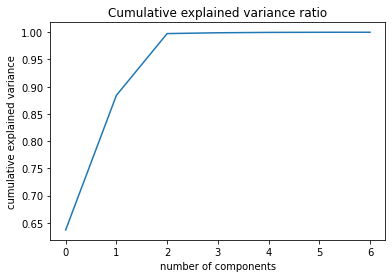

In [ ]:
pca = PCA().fit(train_df)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.title("Cumulative explained variance ratio")
print(np.cumsum(pca.explained_variance_ratio_))

In [ ]:
pca = PCA(n_components=2)
train_df = pd.DataFrame( pca.fit_transform(train_df), columns=['Principal Component 1', 'Principal Component 2'])
test_df = pd.DataFrame(pca.transform(test_df), columns=['Principal Component 1', 'Principal Component 2'])

display( train_df )
display( test_df )
print(train_df.describe())


,Principal Component 1,Principal Component 2
0,-0.126574,0.363977
1,0.047653,-0.209409
2,0.148972,0.021900
3,-0.534392,-0.285101
4,0.479353,0.100947
...,...,...
1138,0.266693,0.446474
1139,0.712835,0.414187
1140,0.200645,-0.249808
1141,-0.070213,0.266338


,Principal Component 1,Principal Component 2
0,0.250521,0.191754
1,0.161573,0.400252
2,0.434069,-0.286305
3,0.675293,0.254149
4,0.974782,0.230172
...,...,...
425,-0.474528,0.004256
426,-0.057383,0.159906
427,-0.262125,-0.281590
428,-0.541653,-0.040304


       Principal Component 1  Principal Component 2
count           1.143000e+03           1.143000e+03
mean           -1.000463e-17          -8.740699e-17
std             3.922401e-01           2.442805e-01
min            -9.038674e-01          -5.554005e-01
25%            -3.187050e-01          -1.963534e-01
50%            -6.093589e-02          -4.183159e-02
75%             3.334458e-01           2.038580e-01
max             9.903698e-01           6.023559e-01


In [ ]:
display( train_df.corr() )

,Principal Component 1,Principal Component 2
Principal Component 1,1.000000e+00,-1.376078e-17
Principal Component 2,-1.376078e-17,1.000000e+00


Counter({1: 645, 0: 498})


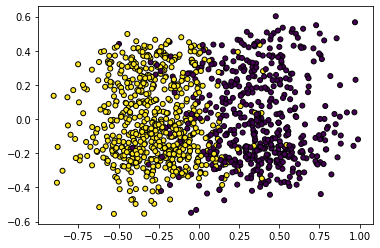

In [ ]:
print(Counter(y_train['classe']))
plt.scatter( train_df.iloc[:, 0], train_df.iloc[:, 1], marker="o", c=y_train['classe'], s=25, edgecolor="k" )
plt.show()

# Detecção e remoção de outliers (DBSCAN e Optics)

https://towardsdatascience.com/a-brief-overview-of-outlier-detection-techniques-1e0b2c19e561

Em seguida, nós utilizamos os algoritmos de agrupamento DBSCAN e Optics para detectarmos outliers presentes nos dados. Primeiro utilizamos o Optics para auxiliar na definição dos parâmetros do DBSCAN, que foi o algoritmo responsável por detectar os outliers. Com os parâmetros utilizamos os algoritmos obtiveram 16 outliers, que foram removidos do dataset.

Optic Model
Number of clusters: {0, 1, -1}


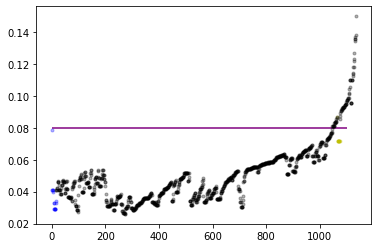

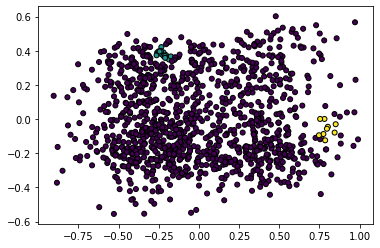

In [ ]:
opticModel = OPTICS(min_samples=10, max_eps=0.15, xi=0.15)
y_optic = opticModel.fit_predict(train_df)

print('Optic Model')
print('Number of clusters: {}'.format(set(opticModel.labels_)))
space = np.arange(len(train_df))
reachability = opticModel.reachability_[opticModel.ordering_]
labels = opticModel.labels_[opticModel.ordering_]
colors = [ "b.", "y.", "r.", "g.", "c." ]
for cclass, color in zip( range(0, 5), colors ):
  Xk = space[ labels==cclass ]
  Rk = reachability[ labels==cclass ]
  plt.plot(Xk, Rk, color, alpha=0.3)

plt.plot( space[ labels == -1 ], reachability[ labels==-1 ], "k.", alpha=0.3 )
plt.hlines(y=0.08, colors='purple', xmin=0.0, xmax=1100)
plt.show()

plt.scatter( train_df.iloc[:, 0], train_df.iloc[:, 1], marker="o", c=y_optic, s=25, edgecolor="k" )
plt.show()

Number of outliers: 37


,Principal Component 1,Principal Component 2,outliers
0,-0.126574,0.363977,0
1,0.047653,-0.209409,0
2,0.148972,0.021900,0
3,-0.534392,-0.285101,0
4,0.479353,0.100947,0
...,...,...,...
1138,0.266693,0.446474,0
1139,0.712835,0.414187,0
1140,0.200645,-0.249808,0
1141,-0.070213,0.266338,0


,classe,outliers
0,1,0
1,0,0
2,0,0
3,1,0
4,0,0
...,...,...
1138,0,0
1139,0,0
1140,0,0
1141,0,0


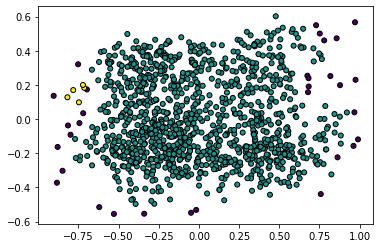

In [ ]:
dbscanModel = DBSCAN(eps=0.08, min_samples=5, metric='euclidean')
clustering = dbscanModel.fit(train_df)
y_dbscan = dbscanModel.fit_predict(train_df)

train_df['outliers'] = clustering.labels_ 
y_train['outliers'] = clustering.labels_
print( "Number of outliers: {}".format( np.count_nonzero(np.array(clustering.labels_), -1)) )
display(train_df)
display(y_train)
plt.scatter( train_df.iloc[:, 0], train_df.iloc[:, 1], marker="o", c=y_dbscan, s=25, edgecolor="k" )
plt.show()

In [ ]:
train_df = train_df[train_df['outliers'] != -1]
y_train = y_train[y_train['outliers'] != -1]

train_df = train_df.drop('outliers', axis=1).reset_index(drop=True)
y_train = y_train.drop('outliers', axis=1).reset_index(drop=True)

display(train_df)
display(y_train)

,Principal Component 1,Principal Component 2
0,-0.126574,0.363977
1,0.047653,-0.209409
2,0.148972,0.021900
3,-0.534392,-0.285101
4,0.479353,0.100947
...,...,...
1106,0.266693,0.446474
1107,0.712835,0.414187
1108,0.200645,-0.249808
1109,-0.070213,0.266338


,classe
0,1
1,0
2,0
3,1
4,0
...,...
1106,0
1107,0
1108,0
1109,0


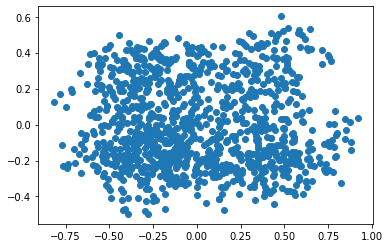

In [ ]:
plt.scatter( train_df.iloc[:, 0], train_df.iloc[:, 1], marker="o")
plt.show()

# Modelos

Para os modelos que exigem definição de parâmetros foi utilizado o método GridSearch para definir os parâmetros que alcançam o melhor resultado.

Já para a avaliação e comparação entre os modelos, foi utilizado a acurácia por validação cruzada.

Para o melhor modelo, levando em conta a métrica citada anteriormente, foi plotada a matriz de confusão. E para os três melhores foram plotadas as curvas ROC com suas respectivas áreas.

In [ ]:
X_train, X_val, Y_train, Y_val = train_test_split(train_df, y_train['classe'], test_size=0.2, random_state=42)

In [ ]:
GridSearch = False

## Logistic Regression

In [ ]:
if GridSearch == True:
    param_grid = {'C':[0.01, 0.1,0.2,0.25,0.3,0.4, 1, 2],'max_iter': [150,200,250, 300, 1000,1500], 'random_state':[42] } 
    log_reg = LogisticRegression()
    log_reg_cv = GridSearchCV(log_reg, param_grid)
    log_reg_cv.fit(X_train, Y_train)
    print(log_reg_cv.best_params_)
    log_reg_cv = log_reg_cv.best_estimator_
    acc_log_reg = cross_val_score(log_reg_cv, X_val, Y_val, cv=10).mean()
    print(acc_log_reg)
    # {'C': 0.4, 'max_iter': 150, 'random_state': 42}
else:
    log_reg_cv = LogisticRegression(C=0.4, max_iter=150, random_state=42).fit(X_train, Y_train).fit(X_train, Y_train)
    acc_log_reg = cross_val_score(log_reg_cv, X_val, Y_val, cv=10).mean()
    print(acc_log_reg)

0.9017786561264824


## kNN Classifier

In [ ]:
if GridSearch == True:
    param_grid = {'n_neighbors': np.arange(1,30), 'p':[1,2]}
    knn = KNeighborsClassifier()
    knn_cv = GridSearchCV(knn, param_grid)
    knn_cv.fit(X_train, Y_train)
    print(knn_cv.best_params_)
    knn_cv = knn_cv.best_estimator_
    acc_knn = cross_val_score(knn_cv, X_val, Y_val, cv=10).mean()
    print(acc_knn)
    # {'n_neighbors': 29, 'p': 2}
else:
    knn_cv = KNeighborsClassifier(n_neighbors=29, p=2).fit(X_train, Y_train)
    acc_knn = cross_val_score(knn_cv, X_val, Y_val, cv=10).mean()
    print(acc_knn)

0.9019762845849802


## Naive-Bayes

In [ ]:
nb_cv = GaussianNB().fit(X_train, Y_train)
nb_cv.predict(X_val)
acc_nb = cross_val_score(nb_cv, X_val, Y_val, cv=10).mean()

print(acc_nb)

0.9108695652173914


## SGD

In [ ]:
if GridSearch == True:
    param_grid = {'alpha':[0.01, 0.1,0.2, 1, 2],'max_iter': [70,75,80,90,120,150,200], 'random_state':[42] } 
    sgd = SGDClassifier()
    sgd_cv =  GridSearchCV(sgd, param_grid)
    sgd_cv.fit(X_train, Y_train)
    print(sgd_cv.best_params_)
    sgd_cv = sgd_cv.best_estimator_
    acc_sgd = cross_val_score(sgd_cv, X_val, Y_val, cv=10).mean()
    print(acc_sgd)
    # {'alpha': 0.01, 'max_iter': 70, 'random_state': 42}
else:
    sgd_cv = SGDClassifier(alpha=0.01, max_iter=70, random_state=42).fit(X_train, Y_train)
    acc_sgd = cross_val_score(sgd_cv, X_val, Y_val, cv=10).mean()
    print(acc_sgd)

0.8974308300395257


## Random Forest

In [ ]:
if GridSearch == True:
    param_grid = { "criterion" : ["gini", "entropy"], "min_samples_leaf" : [1, 5, 10, 25, 50, 70], "min_samples_split" : [2, 4, 10, 12, 16, 18, 25, 35], "n_estimators": [100, 400, 700, 1000, 1500], 'random_state': [42]}
    rf = RandomForestClassifier(n_estimators=100, max_features='auto', oob_score=True, random_state=1, n_jobs=-1)
    rf_cv = GridSearchCV(estimator=rf, param_grid=param_grid, n_jobs=-1)
    rf_cv.fit(X_train, Y_train)
    print(rf_cv.best_params_)
    rf_cv = rf_cv.best_estimator_
    acc_rf = cross_val_score(rf_cv, X_val, Y_val, cv=10).mean()
    print(acc_rf)
    # {'criterion': 'gini', 'min_samples_leaf': 50, 'min_samples_split': 2, 'n_estimators': 700, 'random_state': 42}
else:
    rf_cv = rf = RandomForestClassifier(criterion='gini', n_estimators=700, min_samples_leaf=50, min_samples_split=2, 
                                        oob_score=True, random_state=42, n_jobs=-1).fit(X_train, Y_train)
    acc_rf = cross_val_score(rf_cv, X_val, Y_val, cv=10).mean()
    print(acc_rf)

0.8972332015810277


## AdaBoost

In [ ]:
if GridSearch == True:
    param_grid = {'base_estimator': [LogisticRegression(random_state=1), LogisticRegression(random_state=42), DecisionTreeClassifier()],
                  'learning_rate':[0.1, 0.3, 0.6, 0.9, 1.1, 1.3], 'n_estimators':[55, 60, 65, 70], 'random_state':[42]}
    adb = AdaBoostClassifier()
    adb_cv = GridSearchCV(adb, param_grid)
    adb_cv.fit(X_train, Y_train)
    print(adb_cv.best_params_)
    adb_cv = adb_cv.best_estimator_
    acc_adb = cross_val_score(adb_cv, X_val, Y_val, cv=10).mean()
    print(acc_adb)
    # {'base_estimator': LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True, intercept_scaling=1, l1_ratio=None, max_iter=100, multi_class='auto', n_jobs=None, penalty='l2', random_state=1, solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), 'learning_rate': 1.3, 'n_estimators': 65, 'random_state': 42}
else:
    adb_cv = AdaBoostClassifier(base_estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, 
                                                                  fit_intercept=True, intercept_scaling=1, 
                                                                  l1_ratio=None, max_iter=100, 
                                                                  multi_class='auto', n_jobs=None, 
                                                                  penalty='l2', random_state=1, 
                                                                  solver='lbfgs', tol=0.0001, verbose=0, 
                                                                  warm_start=False), 
                                learning_rate=1.3, n_estimators=65, random_state=42).fit(X_train, Y_train)
    acc_adb = cross_val_score(adb_cv, X_val, Y_val, cv=10).mean()
    print(acc_adb)

0.9063241106719369


## Bagging Classifier

In [ ]:
if GridSearch == True:
    param_grid = {'base_estimator': [LogisticRegression(random_state=42), DecisionTreeClassifier()],
                  'max_features':[1, 2],'max_samples':[30,40,50,60], 'n_estimators':[20,30,40,50],
                  'random_state':[42] } 
    bc = BaggingClassifier(n_jobs=-1)
    bc_cv = GridSearchCV(bc, param_grid)
    bc_cv.fit(X_train, Y_train)
    print(bc_cv.best_params_)
    bc_cv = bc_cv.best_estimator_
    acc_bc = cross_val_score(bc_cv, X_val, Y_val, cv=10).mean()
    print(acc_bc)
    # {'base_estimator': DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini', max_depth=None, max_features=None, max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, min_samples_leaf=1, min_samples_split=2, min_weight_fraction_leaf=0.0, presort='deprecated', random_state=None, splitter='best'), 'max_features': 2, 'max_samples': 60, 'n_estimators': 40, 'random_state': 42}
else:
    bc_cv = BaggingClassifier(base_estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, 
                                                                    criterion='gini', max_depth=None, 
                                                                    max_features=None, max_leaf_nodes=None, 
                                                                    min_impurity_decrease=0.0, 
                                                                    min_impurity_split=None, min_samples_leaf=1, 
                                                                    min_samples_split=2, 
                                                                    min_weight_fraction_leaf=0.0, 
                                                                    presort='deprecated', random_state=None, 
                                                                    splitter='best'), max_features=2, 
                              max_samples=60, n_estimators=40, random_state=42, n_jobs=-1).fit(X_train, Y_train)
    acc_bc = cross_val_score(bc_cv, X_val, Y_val, cv=10).mean()
    print(acc_bc)

0.9019762845849802


## XGBoost

0.906719367588933


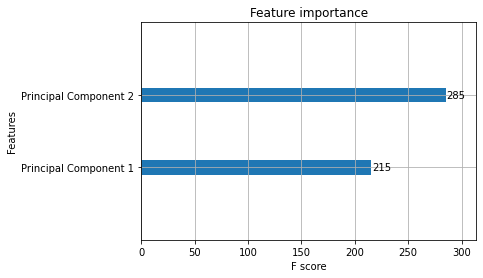

In [ ]:
if GridSearch == True:
    param_grid = {'n_estimators':[300,500,1000], 'objective':['binary:logistic'], 'eval_metric': ['logloss'], 'learning_rate':[0.1, 0.5, 1],'max_depth':[1, 5, 10] }
    xgb = xgb.XGBClassifier()
    xgb_cv =  GridSearchCV(xgb, param_grid) 
    xgb_cv.fit(X_train, Y_train)
    print(xgb_cv.best_params_)
    xgb_cv = xgb_cv.best_estimator_
    acc_xgb = cross_val_score(xgb_cv, X_val, Y_val, cv=10).mean()
    print(acc_xgb)
    # {'eval_metric': 'logloss', 'learning_rate': 0.1, 'max_depth': 1, 'n_estimators': 500, 'objective': 'binary:logistic'}
else:
    xgb_cv = xgb.XGBClassifier(learning_rate=0.1, max_depth=1, n_estimators=500, eval_metric='logloss', objective='binary:logistic').fit(X_train, Y_train)
    acc_xgb = cross_val_score(xgb_cv, X_val, Y_val, cv=10).mean()
    print(acc_xgb)
plot_importance(xgb_cv)

## Stacking Classifier

In [ ]:
estimators = [('bagging_clf', bc_cv), ('naivebayes_clf', nb_cv), ('XGB_clf', xgb_cv), ('knn_clf', knn_cv)]

stack_clf = StackingClassifier(estimators=estimators, final_estimator=nb_cv).fit(X_train, Y_train)
acc_stg = cross_val_score(stack_clf, X_val, Y_val, cv=10).mean()
print(acc_stg)

0.9019762845849802


## Voting Classifier

In [ ]:
estimators = [('bagging_clf', bc_cv), ('naivebayes_clf', nb_cv), ('XGB_clf', xgb_cv), ('knn_clf', knn_cv)]

vc_clf = VotingClassifier(estimators=estimators, voting='hard').fit(X_train, Y_train)
acc_vc = cross_val_score(vc_clf, X_val, Y_val, cv=10).mean()
print(acc_vc)

0.9063241106719369


# Avaliação dos modelos implementados

In [ ]:
models = pd.DataFrame({ 'Model': ['KNN', 'Logistic Regression', 'Random Forest', 'Naive Bayes', 
                                  'AdaBoost', 'Stochastic Gradient Decent', 'BaggingClassifier',
                                  'XGBoost', 'StackingClassifier', 'VotingClassifier'],
                       'Score': [acc_knn, acc_log_reg, acc_rf, acc_nb, acc_adb, 
                                 acc_sgd, acc_bc, acc_xgb, acc_stg, acc_vc]})
models.sort_values(by='Score', ascending=False)

,Model,Score
3,Naive Bayes,0.910870
7,XGBoost,0.906719
4,AdaBoost,0.906324
9,VotingClassifier,0.906324
0,KNN,0.901976
6,BaggingClassifier,0.901976
8,StackingClassifier,0.901976
1,Logistic Regression,0.901779
5,Stochastic Gradient Decent,0.897431
2,Random Forest,0.897233


## Matriz de Confusão

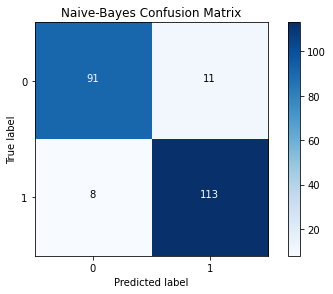

In [ ]:
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Predict the values from the validation dataset
Y_pred = nb_cv.predict(X_val)
Y_pred_classes = Y_pred
Y_true = Y_val
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
plot_confusion_matrix(confusion_mtx, classes=range(2), title="Naive-Bayes Confusion Matrix") 

## Curva ROC

Curva ROC apresenta a proporção de verdadeiros positivos e falsos positivos. A linha tracejada indica um "modelo" completamente aleatório. Dessa forma, modelos que se encontram abaixo dessa linha possuem um desempenho muito ruim, pior que uma análise aleatória.
No caso, foram plotados os 3 melhores modelos seguindo a métrica de acurácia por validação cruzada. Ambos estão bem acima da linha tracejada, indicando um bom resultado. Além da visualização do gráfico, a área sob as curvas é uma medida de desempenho, uma vez que quanto maior for a área, maior é a proporção de acertos de verdadeiros positivos e consequentemente, melhor o algoritmo.

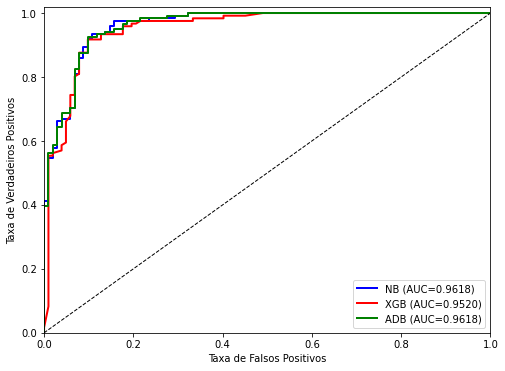

In [ ]:
Y_prob_NB = nb_cv.predict_proba(X_val)[:, 1]
Y_prob_XGB = xgb_cv.predict_proba(X_val)[:, 1]
Y_prob_ADB = adb_cv.predict_proba(X_val)[:, 1]

fprNB, tprNB, _ = roc_curve( Y_val, Y_prob_NB )
fprXGB, tprXGB, _ = roc_curve( Y_val, Y_prob_XGB)
fprADB, tprADB, _ = roc_curve( Y_val, Y_prob_ADB)

aucNB = roc_auc_score( Y_val, Y_prob_NB )
aucXGB = roc_auc_score( Y_val, Y_prob_XGB )
aucADB = roc_auc_score( Y_val, Y_prob_ADB )

plt.figure(figsize=(8, 6))
plt.plot(fprNB, tprNB, color="blue", lw=2, label="NB (AUC=%0.4f)"%aucNB)
plt.plot(fprXGB, tprXGB, color="red", lw=2, label="XGB (AUC=%0.4f)"%aucXGB)
plt.plot(fprADB, tprADB, color="green", lw=2, label="ADB (AUC=%0.4f)"%aucADB)
plt.plot([0,1], [0, 1], color="black", lw=1, linestyle="--")

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.02])
plt.xlabel("Taxa de Falsos Positivos")
plt.ylabel("Taxa de Verdadeiros Positivos")
plt.legend()

# Plot da superfície de decisão
Por último nós plotamos a superfície de decisão do modelo GaussianNB que obteve os melhores resultados. No gráfico os pontos representam os valores reais de cada classe, e a malha no fundo representa como os valores de "Principal Component 1" e "Principal Component 2" serão classificados.



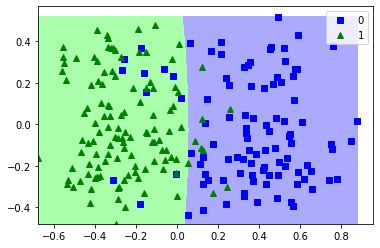

In [ ]:
from matplotlib.colors import ListedColormap

h = 0.001
x1t, x2t = np.meshgrid(np.arange(X_val['Principal Component 1'].min(), X_val['Principal Component 1'].max(), h), np.arange(X_val['Principal Component 2'].min(), X_val['Principal Component 2'].max(), h))

Yt = nb_cv.predict(np.c_[x1t.ravel(), x2t.ravel()])

Yt = Yt.reshape( x1t.shape )

cores = ListedColormap(["#AAAAFF", "#AAFFAA"])
plt.pcolormesh(x1t, x2t, Yt, cmap=cores)
X_concat = pd.concat([X_val, Y_val], axis=1)

x0 = X_concat.loc[ X_concat.classe == 0, :]
x1 = X_concat.loc[ X_concat.classe == 1, :]

plt.plot(x0['Principal Component 1'], x0['Principal Component 2'], "bs", x1['Principal Component 1'], x1['Principal Component 2'], "g^")
plt.legend(['0', '1'])
plt.show()

# Predizendo valores da base de teste

In [ ]:
from google.colab import drive
drive.mount("/content/drive")


Y_pred = nb_cv.predict(test_df)

test_df['classe'] = Y_pred
# df = pd.DataFrame(Y_pred, columns="classe")
display(test_df)
test_df['classe'].to_csv('/content/drive/MyDrive/trab07Predito.csv')


Mounted at /content/drive


,Principal Component 1,Principal Component 2,classe
0,0.250521,0.191754,0
1,0.161573,0.400252,0
2,0.434069,-0.286305,0
3,0.675293,0.254149,0
4,0.974782,0.230172,0
...,...,...,...
425,-0.474528,0.004256,1
426,-0.057383,0.159906,1
427,-0.262125,-0.281590,1
428,-0.541653,-0.040304,1
